In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
size=(19,9)
sns.set_style('darkgrid')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ColabDataset/Concatenate_B2C_B2E.csv')


DataTotalLen = len(data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType
0,01-12-2018 11:43,2160,Other Product,Domestic
1,01-12-2018 11:43,0.49,Other Product,Domestic
2,01-12-2018 13:01,6550,Air,Domestic
3,01-12-2018 13:10,6550,Air,Domestic
4,30-11-2018 14:30,5497,Air,Domestic
5,01-12-2018 14:09,4818,Air,Domestic
6,30-11-2018 14:30,1768,Air,Domestic
7,01-12-2018 13:10,7300,Air,Domestic
8,30-11-2018 17:30,7050,Air,Domestic
9,01-12-2018 14:25,7300,Air,Domestic


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['InvoiceTime'] = data['InvoiceDate'].dt.time

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-01-12 11:43:00,2160,Other Product,Domestic,11:43:00
1,2018-01-12 11:43:00,0.49,Other Product,Domestic,11:43:00
2,2018-01-12 13:01:00,6550,Air,Domestic,13:01:00
3,2018-01-12 13:10:00,6550,Air,Domestic,13:10:00
4,2018-11-30 14:30:00,5497,Air,Domestic,14:30:00
5,2018-01-12 14:09:00,4818,Air,Domestic,14:09:00
6,2018-11-30 14:30:00,1768,Air,Domestic,14:30:00
7,2018-01-12 13:10:00,7300,Air,Domestic,13:10:00
8,2018-11-30 17:30:00,7050,Air,Domestic,17:30:00
9,2018-01-12 14:25:00,7300,Air,Domestic,14:25:00


In [ ]:
data['InvoiceDate'] = data['InvoiceDate'].dt.date

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-01-12,2160,Other Product,Domestic,11:43:00
1,2018-01-12,0.49,Other Product,Domestic,11:43:00
2,2018-01-12,6550,Air,Domestic,13:01:00
3,2018-01-12,6550,Air,Domestic,13:10:00
4,2018-11-30,5497,Air,Domestic,14:30:00
5,2018-01-12,4818,Air,Domestic,14:09:00
6,2018-11-30,1768,Air,Domestic,14:30:00
7,2018-01-12,7300,Air,Domestic,13:10:00
8,2018-11-30,7050,Air,Domestic,17:30:00
9,2018-01-12,7300,Air,Domestic,14:25:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278466 entries, 0 to 278465
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   InvoiceDate    278464 non-null  object
 1   NetFare        217576 non-null  object
 2   ProductType    278464 non-null  object
 3   ItineraryType  245689 non-null  object
 4   InvoiceTime    278464 non-null  object
dtypes: object(5)
memory usage: 10.6+ MB


In [ ]:
data.describe()

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
count,278464,217576.0,278464,245689,278464
unique,425,31033.0,14,2,1427
top,2019-06-05,0.0,Air,Domestic,17:01:00
freq,2427,21931.0,151995,225231,922


In [ ]:
data.describe(include='object')

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
count,278464,217576.0,278464,245689,278464
unique,425,31033.0,14,2,1427
top,2019-06-05,0.0,Air,Domestic,17:01:00
freq,2427,21931.0,151995,225231,922


In [ ]:
for x in data.columns:
  print("Total % Null value in "+x+" - ",data[x].isna().sum()/len(data)*100)
  print()

Total % Null value in InvoiceDate -  0.0007182205367980292

Total % Null value in NetFare -  21.866224242816

Total % Null value in ProductType -  0.0007182205367980292

Total % Null value in ItineraryType -  11.770557267314501

Total % Null value in InvoiceTime -  0.0007182205367980292



In [ ]:
dateFinder = re.compile('[0-9]{2}-[0-9]{2}.+')
def FloatConverter(x):
  if(type(x)!=int)or(type(x)!=float):
    x = str(x)
    if(dateFinder.match(x)):
      print(x)
      return np.nan
    else:
      return float(x)
  else:
    print(x)
    return float(x)
  
    

data['NetFare'] = data['NetFare'].apply(FloatConverter)

06-06-2019 17:08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278466 entries, 0 to 278465
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceDate    278464 non-null  object 
 1   NetFare        217575 non-null  float64
 2   ProductType    278464 non-null  object 
 3   ItineraryType  245689 non-null  object 
 4   InvoiceTime    278464 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.6+ MB


In [ ]:
for x in data.columns:
  print("Total % Null value in "+x+" - ",data[x].isna().sum()/len(data)*100)
  print()

Total % Null value in InvoiceDate -  0.0007182205367980292

Total % Null value in NetFare -  21.866583353084398

Total % Null value in ProductType -  0.0007182205367980292

Total % Null value in ItineraryType -  11.770557267314501

Total % Null value in InvoiceTime -  0.0007182205367980292



We all see all the NetFare value are changed from Object to Float without losing any single value

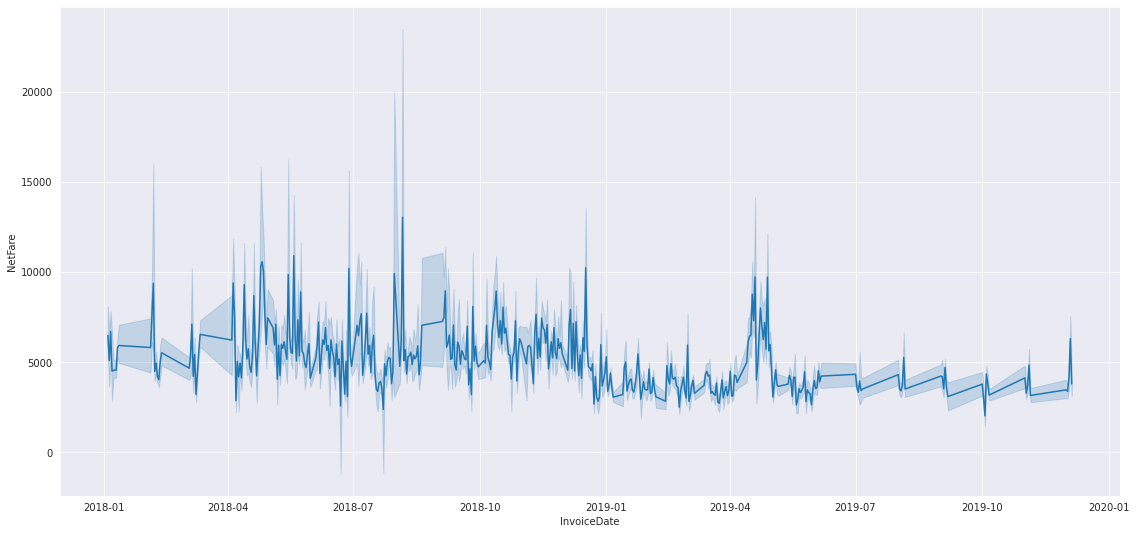

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data)

plt.show()

As Per the rule we should remove the OUTLIERS First the then we will fill the Missing Value

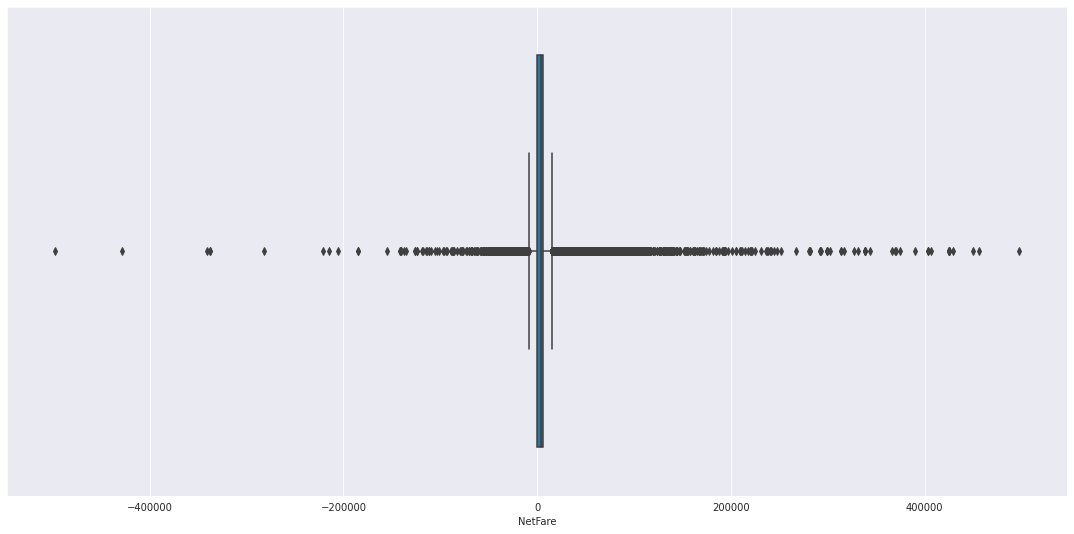

In [ ]:
plt.figure(figsize=size)

sns.boxplot(data['NetFare'])

plt.show()

Now we will plot graph form -15k to +15k 

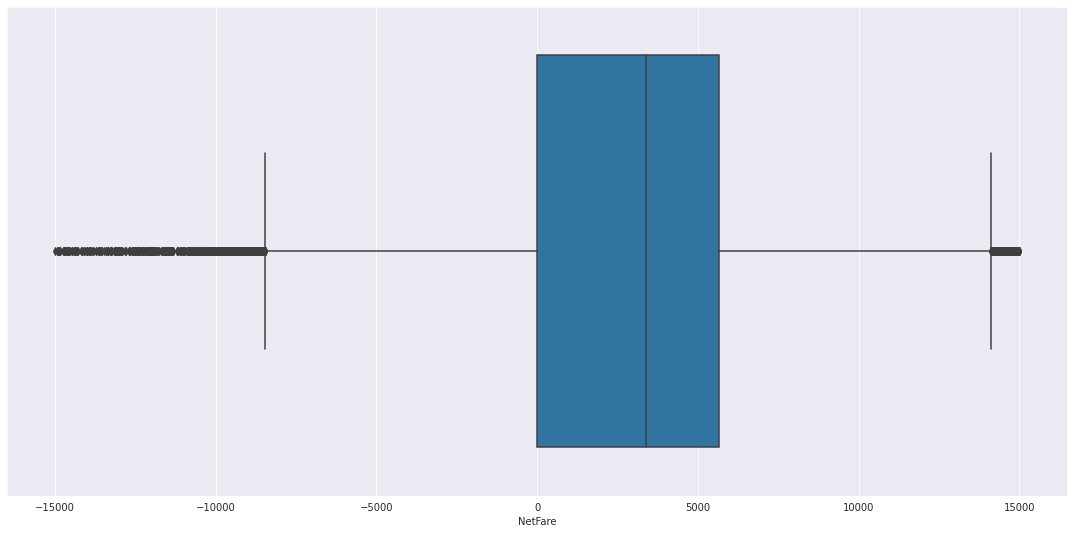

In [ ]:
x = data[(data['NetFare']<15000)&(data['NetFare']>-15000)]['NetFare']

plt.figure(figsize=size)

sns.boxplot(x)

plt.show()

In [ ]:
data['NetFare'].describe()

count    217575.000000
mean       4266.724328
std        9802.796727
min     -497324.000000
25%          10.000000
50%        3501.000000
75%        5944.000000
max      497678.000000
Name: NetFare, dtype: float64

NetFare also have the negative value so we will eliminate the Negative value Because price of ticket can't be negative.

And 
NetFare or NetRate -> is the price of a ticket minus any third party commission or tax.

In [ ]:
i = data[data['NetFare'] <0].index
print(data.shape)
data.drop(i,inplace=True)
print(data.shape)

(278466, 5)
(266095, 5)


In [ ]:
data.shape


(266095, 5)

We all know that Fare for Domestic Flights are lower than International so we separate the Domestic and International Flight fare.

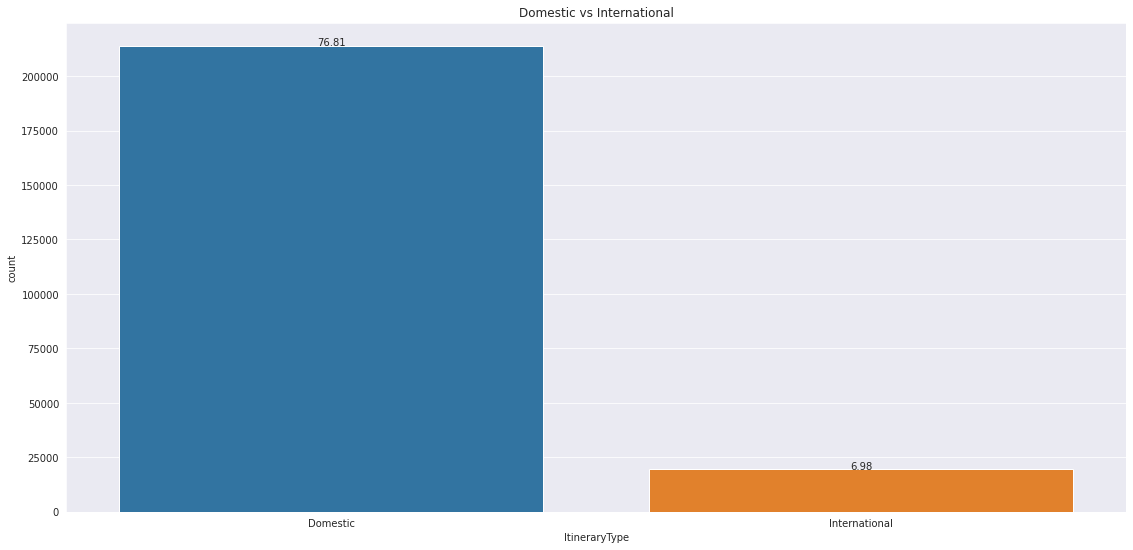

In [ ]:
plt.figure(figsize=size)

ax = sns.countplot(data['ItineraryType'])

for x in ax.patches:
  height= x.get_height()

  ax.text(x.get_x()+x.get_width()/2,
          height,
          '{:.2f}'.format(height/DataTotalLen*100),
          ha='center')

plt.title('Domestic vs International')

plt.show()

**Domestic Flight Fare**

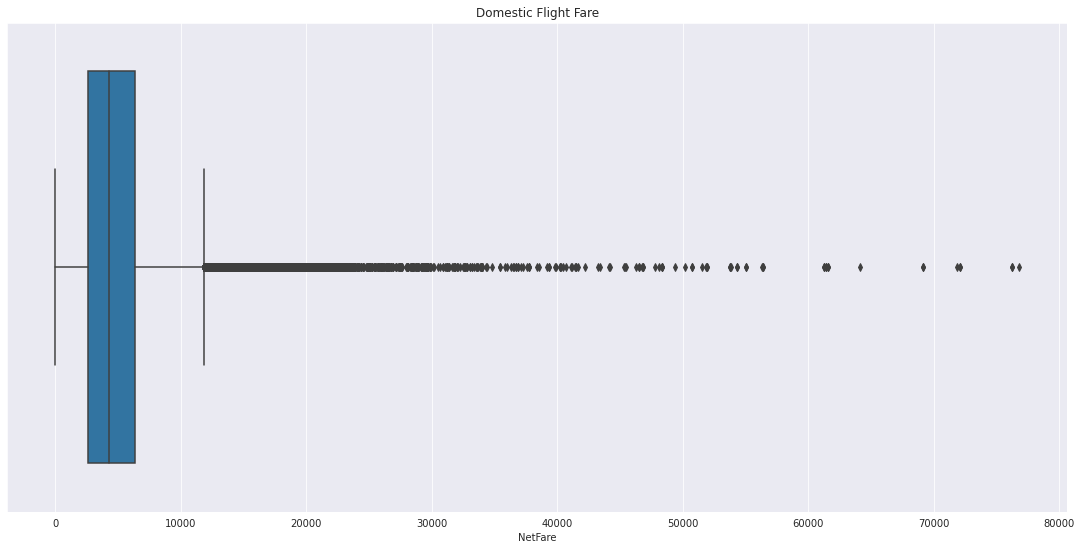

In [ ]:
DomFare = data[data['ItineraryType']=='Domestic']['NetFare']

plt.figure(figsize=size)

sns.boxplot(DomFare)

plt.title('Domestic Flight Fare')

plt.show()

In [ ]:
DomFare.describe()

count    159033.000000
mean       4707.570229
std        3463.265478
min           0.000000
25%        2625.000000
50%        4255.000000
75%        6315.000000
max       76800.000000
Name: NetFare, dtype: float64

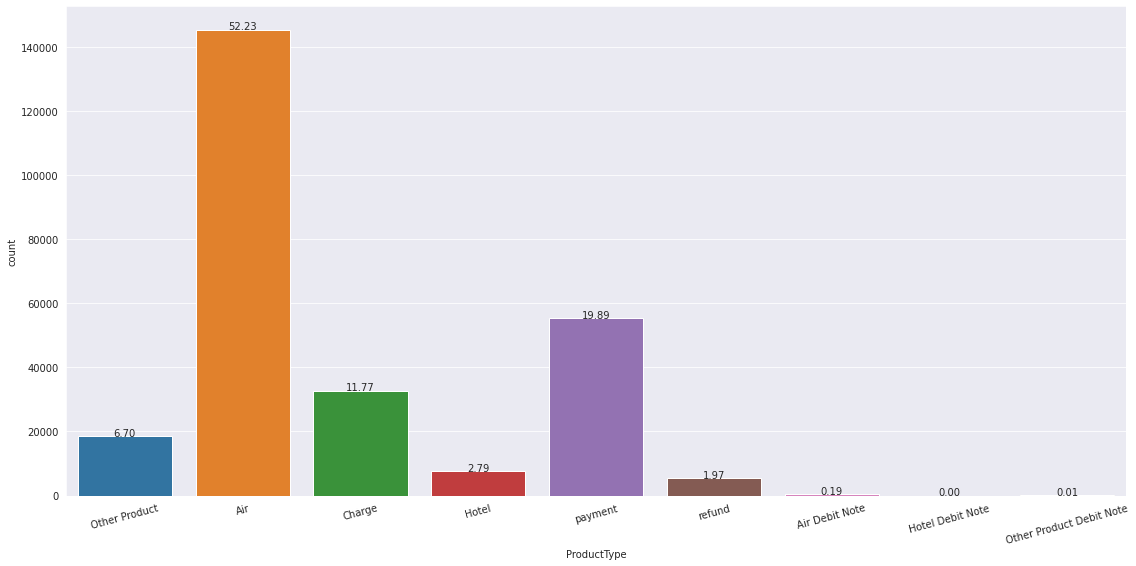

In [ ]:
plt.figure(figsize=size)

ax = sns.countplot(data['ProductType'])

for x in ax.patches:
  height = x.get_height()

  ax.text(x.get_x() + x.get_width()/2,
          height+1,
          '{:.2f}'.format(height/DataTotalLen*100),
          ha='center')



plt.xticks(rotation=15)

plt.show()

From above Graph we will can see only three variable are having good amount of data. So we remove all other variable except AIR, CHARGE and  PAYMENT.



In [ ]:
Prodcut_Fare = data[(data['ProductType']=='payment')|(data['ProductType']=='Charge')|(data['ProductType']=='Air')]

In [ ]:
Prodcut_Fare.describe()

,NetFare
count,178212.000000
mean,5269.366031
std,9630.826667
min,0.000000
25%,1991.000000
50%,4055.000000
75%,6374.000000
max,497678.000000


In [ ]:
# Prodcut_Fare = data[(data['ProductType']=='Air')]
# Prodcut_Fare.describe()

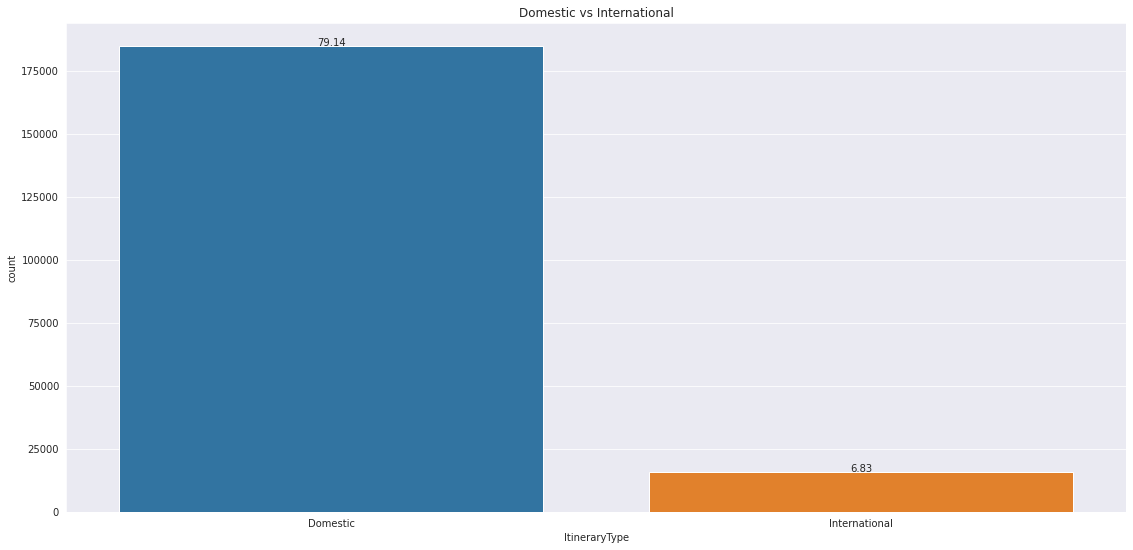

In [ ]:
plt.figure(figsize=size)

ax = sns.countplot(Prodcut_Fare['ItineraryType'])

total = len(Prodcut_Fare)
for x in ax.patches:
  height= x.get_height()

  ax.text(x.get_x()+x.get_width()/2,
          height,
          '{:.2f}'.format(height/total*100),
          ha='center')

plt.title('Domestic vs International')

plt.show()

In [ ]:
Domestic_Prodcut_Fare = Prodcut_Fare[Prodcut_Fare['ItineraryType']=='Domestic']

Domestic_Prodcut_Fare.describe()

,NetFare
count,135029.000000
mean,5159.113931
std,3021.969443
min,0.000000
25%,3181.000000
50%,4611.000000
75%,6571.000000
max,64131.000000


We can clearly see there is drop in  Standard Deviation and also in the MAX value 

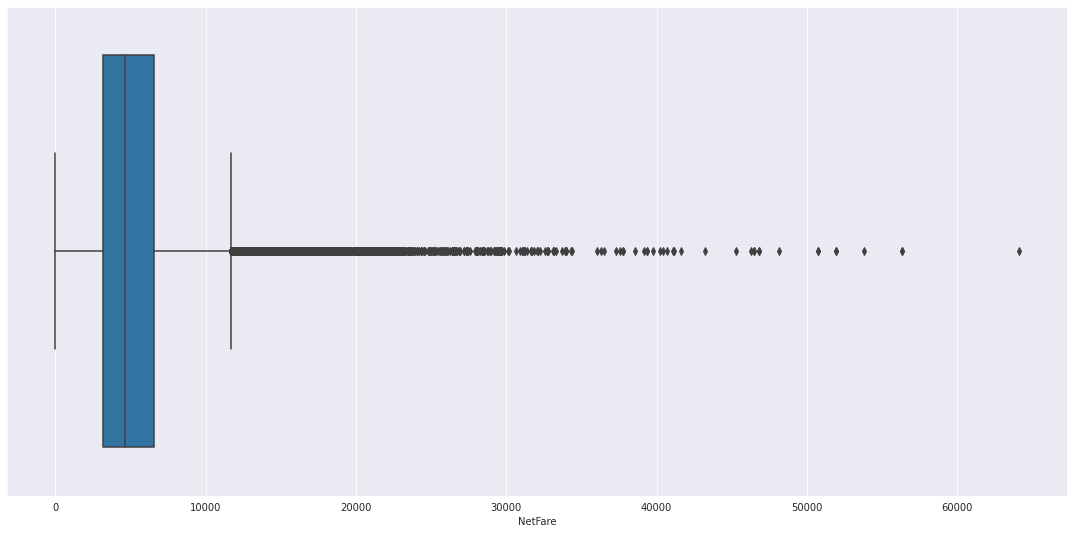

In [ ]:
plt.figure(figsize=size)

sns.boxplot(Domestic_Prodcut_Fare['NetFare'])

plt.show()

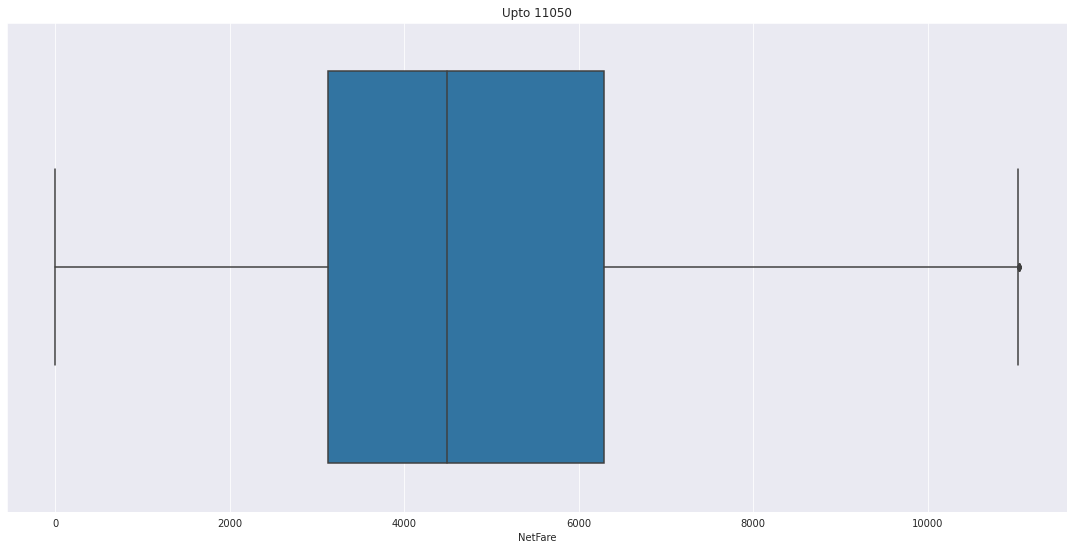

In [ ]:
x = Domestic_Prodcut_Fare[(Domestic_Prodcut_Fare['NetFare']<11050)]['NetFare']

plt.figure(figsize=size)

sns.boxplot(x)
plt.title('Upto 11050')

plt.show()

Yes it seems to very obvious from domestic flight NETFARE the Max Price can be upto 11k 


**International Flight**

In [ ]:
International_Product_Fare = Prodcut_Fare[Prodcut_Fare['ItineraryType']=='International']

International_Product_Fare.describe()

,NetFare
count,10408.000000
mean,23293.069193
std,32516.707915
min,0.000000
25%,7130.000000
50%,14996.000000
75%,27285.250000
max,497678.000000


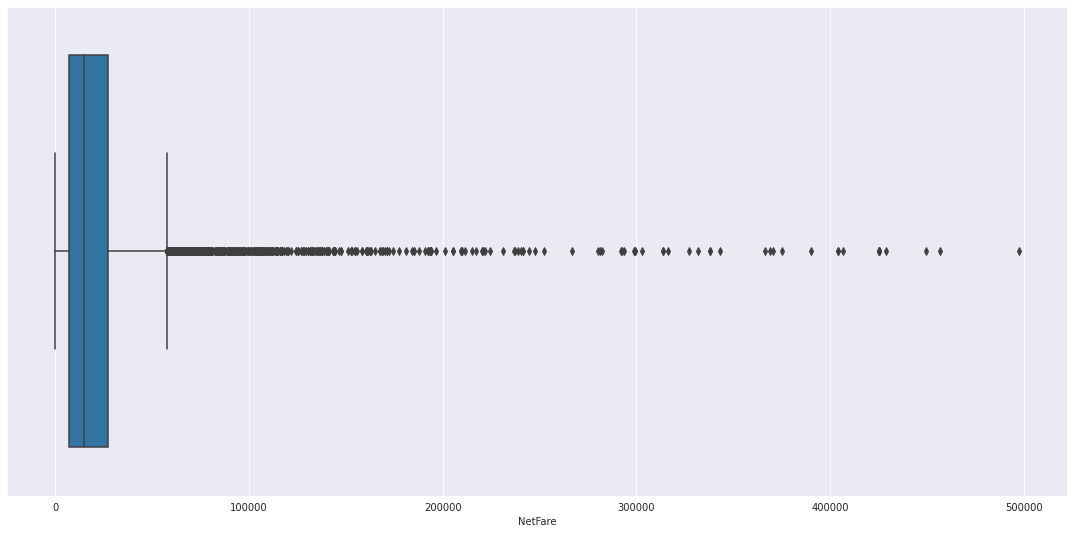

In [ ]:
plt.figure(figsize=size)

sns.boxplot(International_Product_Fare['NetFare'])

plt.show()

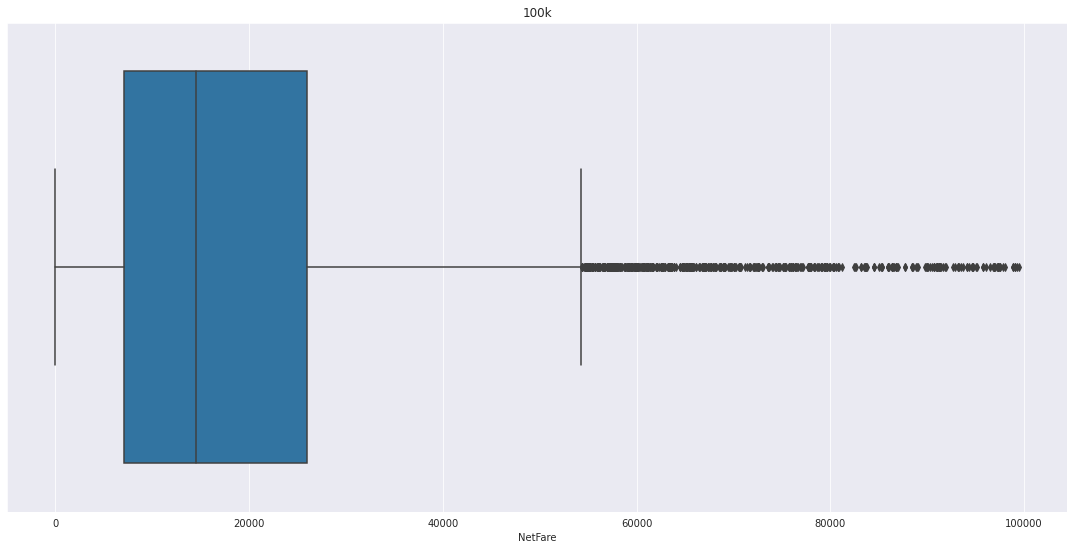

In [ ]:
x = International_Product_Fare[(International_Product_Fare['NetFare']<100000)]['NetFare']

plt.figure(figsize=size)

sns.boxplot(x)

plt.title('100k')

plt.show()

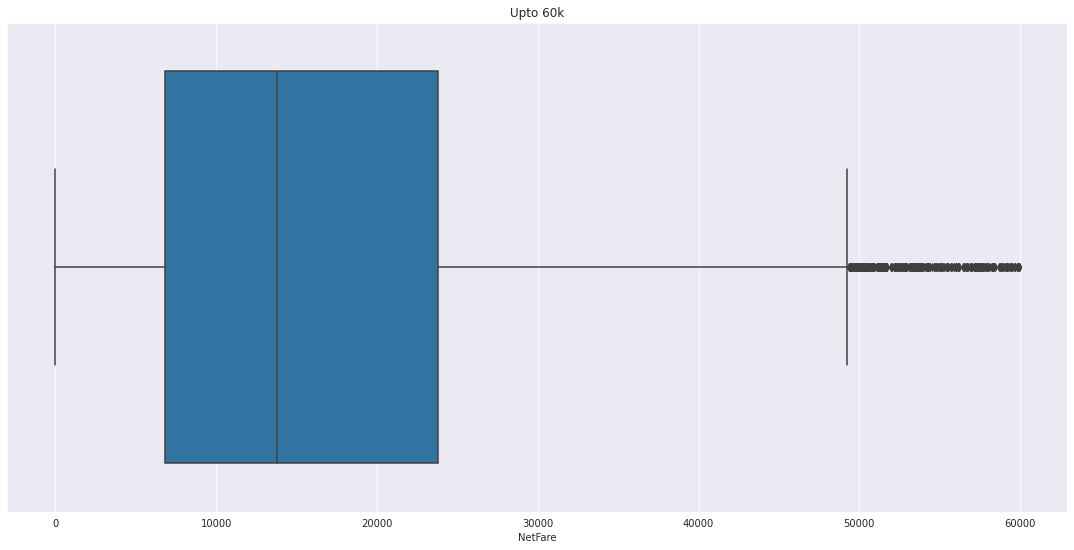

In [ ]:
x = International_Product_Fare[(International_Product_Fare['NetFare']<60000)]['NetFare']

plt.figure(figsize=size)

sns.boxplot(x)

plt.title('Upto 60k')

plt.show()

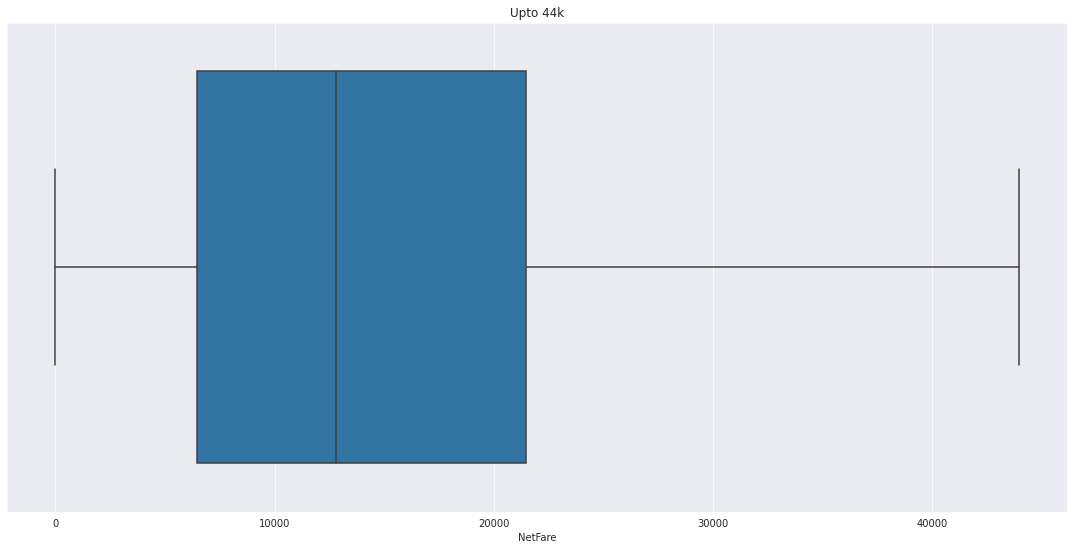

In [ ]:
x = International_Product_Fare[(International_Product_Fare['NetFare']<44000)]['NetFare']

plt.figure(figsize=size)

sns.boxplot(x)

plt.title('Upto 44k')

plt.show()

We will use Smoothing technique to romove the outliers from Domestic and Interantional separately

**Domestic Smoothing**

In [ ]:
DomAlpha1 = Domestic_Prodcut_Fare['NetFare'].ewm(alpha=0.1).mean()
DomAlpha3 = Domestic_Prodcut_Fare['NetFare'].ewm(alpha=0.3).mean()
DomAlpha6 = Domestic_Prodcut_Fare['NetFare'].ewm(alpha=0.6).mean()
DomAlpha9 = Domestic_Prodcut_Fare['NetFare'].ewm(alpha=0.9).mean()
DomAlpha1 = Domestic_Prodcut_Fare['NetFare'].ewm(alpha=1).mean()

In [ ]:
print(DomAlpha1.describe())
print()
print()
print(DomAlpha3.describe())
print()
print()
print(DomAlpha6.describe())
print()
print()
print(DomAlpha9.describe())
print()
print()
print(DomAlpha1.describe())

count    184886.000000
mean       5061.822922
std        2946.466403
min           0.000000
25%        3144.000000
50%        4471.000000
75%        6435.000000
max       64131.000000
Name: NetFare, dtype: float64


count    184886.000000
mean       5045.203179
std        1925.301438
min          64.856996
25%        3752.534266
50%        4783.266447
75%        6056.502725
max       28957.913118
Name: NetFare, dtype: float64


count    184886.000000
mean       5056.623911
std        2446.666541
min           0.026279
25%        3440.439777
50%        4653.954463
75%        6257.548573
max       43939.099698
Name: NetFare, dtype: float64


count    1.848860e+05
mean     5.061088e+03
std      2.821226e+03
min      3.094751e-10
25%      3.217115e+03
50%      4.520240e+03
75%      6.392102e+03
max      5.804934e+04
Name: NetFare, dtype: float64


count    184886.000000
mean       5061.822922
std        2946.466403
min           0.000000
25%        3144.000000
50%        4471.000000
75%   

We can see that Mean value is not getting changing change and also the 75% value 

So we will use the 75% as threshold value and value the above it we will eliminate it.

We use threshold Value for removing the Outliers,

Separately for Domestic and International

In [ ]:
i = Prodcut_Fare[(Prodcut_Fare['NetFare']>11050)&(Prodcut_Fare['ItineraryType']=='Domestic')].index

Prodcut_Fare.drop(i,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
i = Prodcut_Fare[(Prodcut_Fare['NetFare']>44000)&(Prodcut_Fare['ItineraryType']=='International')].index

Prodcut_Fare.drop(i,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Prodcut_Fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227296 entries, 2 to 278465
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceDate    227296 non-null  object 
 1   NetFare        171902 non-null  float64
 2   ProductType    227296 non-null  object 
 3   ItineraryType  194521 non-null  object 
 4   InvoiceTime    227296 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


In [ ]:
Prodcut_Fare.describe()

,NetFare
count,171902.000000
mean,4410.347288
std,4403.561738
min,0.000000
25%,1878.000000
50%,3929.000000
75%,6052.000000
max,44000.000000


In [ ]:
Prodcut_Fare.to_csv('/content/drive/My Drive/ColabDataset/WithoutOutliersFlightFare.csv',index=False)

In [ ]:
data2=pd.read_csv('/content/drive/My Drive/ColabDataset/WithoutOutliersFlightFare.csv')

In [ ]:
data2.head()

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-01-12,6550.0,Air,Domestic,13:01:00
1,2018-01-12,6550.0,Air,Domestic,13:10:00
2,2018-11-30,5497.0,Air,Domestic,14:30:00
3,2018-01-12,4818.0,Air,Domestic,14:09:00
4,2018-11-30,1768.0,Air,Domestic,14:30:00


In [ ]:
data2['ProductType'].value_counts()

Air        139127
payment     55394
Charge      32775
Name: ProductType, dtype: int64

In [ ]:
data2['ItineraryType'].value_counts()

Domestic         179860
International     14661
Name: ItineraryType, dtype: int64